#### init

In [1]:
import numpy as np
import scipy.signal as sp
import matplotlib.pyplot as plt

In [2]:
# helper function for basic plotting
def plot(x, y, title="", xlabel="", ylabel="", legend=None):
    if legend is None:
        plt.figure(figsize=(8, 5))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(x, y)
    if legend is not None:
        plt.legend(legend)
    plt.grid(True)

#### Time Response of a Spring

In [3]:
# f(t) = cos(freq*t) exp(-decay*t) u(t)
# d2x/dt2 + freq^2 * x = f(t)
def time_response_spring(decay):
    den = np.polymul([1, 0, 1.5 ** 2], [1, 2 * decay, decay ** 2 + 1.5 ** 2])
    return sp.lti([1, decay], den)

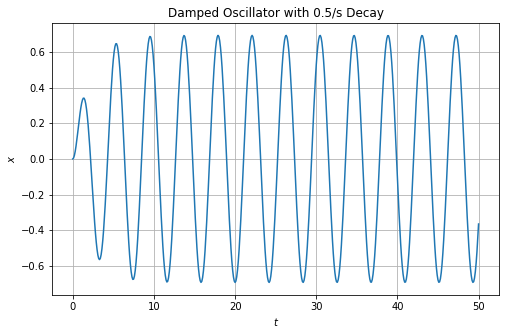

In [4]:
t, x = sp.impulse(time_response_spring(0.5), T=np.linspace(0, 50, 501))
plot(t, x, "Damped Oscillator with 0.5/s Decay", "$t$", "$x$")

#### Response with Smaller Decay

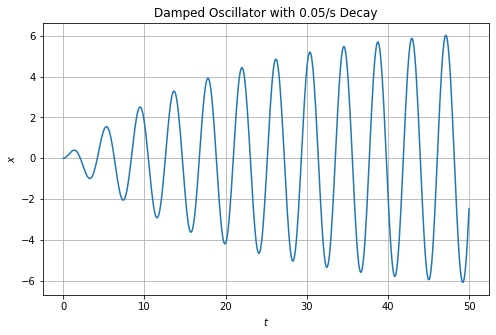

In [5]:
_, x = sp.impulse(time_response_spring(0.05), T=t)
plot(t, x, "Damped Oscillator with 0.05/s Decay", "$t$", "$x$")

#### Response at Varying Frequencies

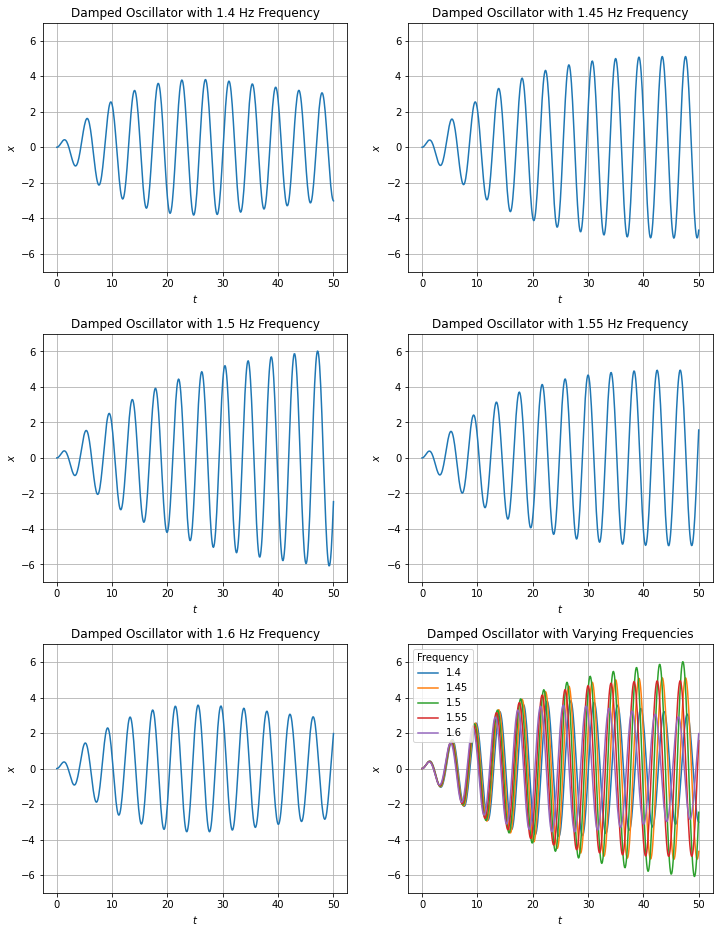

In [6]:
plt.figure(figsize=(12, 16)).subplots_adjust(hspace=0.25)
ax = plt.subplot(3, 2, 6)

H = sp.lti([1], [1, 0, 1.5 ** 2])

for i, freq in enumerate(np.linspace(1.4, 1.6, 5)):
    # f(t) = cos(freq*t) exp(-decay*t) u(t)
    f = np.cos(freq * t) * np.exp(-0.05 * t) * (t >= 0)
    x = sp.lsim(H, f, t)[1]

    ax.plot(t, x, label=freq)
    plt.subplot(3, 2, i + 1)
    plt.title(f"Damped Oscillator with {freq} Hz Frequency")
    plt.xlabel("$t$")
    plt.ylabel("$x$")
    plt.plot(t, x)
    plt.ylim(-7, 7)
    plt.grid()

ax.set_title("Damped Oscillator with Varying Frequencies")
ax.set_xlabel("$t$")
ax.set_ylabel("$x$")
ax.set_ylim(-7, 7)
ax.legend(title="Frequency")
ax.grid()

#### Coupled Spring Problem

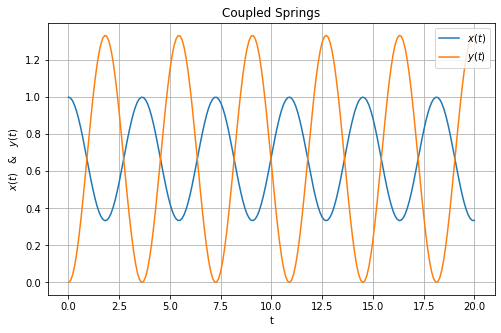

In [7]:
# d2x/dt2 + (x - y) = 0
# d2y/dt2 + 2*(y - x) = 0
t, x = sp.impulse(sp.lti([1, 0, 2], [1, 0, 3, 0]), T=np.linspace(0, 20, 201))
_, y = sp.impulse(sp.lti([2], [1, 0, 3, 0]), T=t)

plot(t, x)
plot(t, y, "Coupled Springs", "t", "$x(t)$   &   $y(t)$", ["$x(t)$", "$y(t)$"])

#### Magnitude and Phase Responses

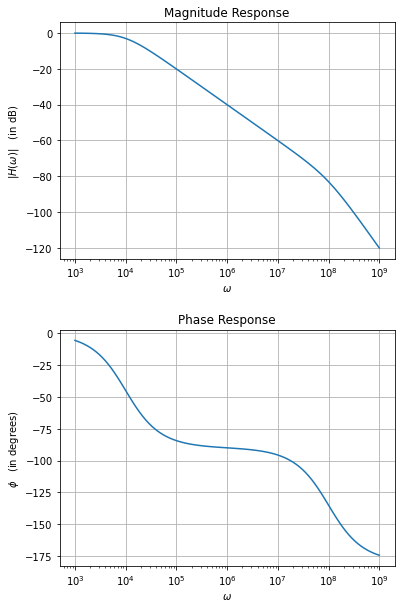

In [8]:
# H(s) = 1 / (LCs^2 + RCs + 1)
H = sp.lti([1], [1e-6 * 1e-6, 100 * 1e-6, 1])

w, S, phi = H.bode()
plt.figure(figsize=(6, 10)).subplots_adjust(hspace=0.3)
plt.subplot(2, 1, 1)
plt.title("Magnitude Response")
plt.xlabel("$\omega$")
plt.ylabel("$|H(\omega)|$   (in dB)")
plt.semilogx(w, S)
plt.grid()
plt.subplot(2, 1, 2)
plt.title("Phase Response")
plt.xlabel("$\omega$")
plt.ylabel("$\phi$   (in degrees)")
plt.semilogx(w, phi)
plt.grid()

#### Output Signal Analysis

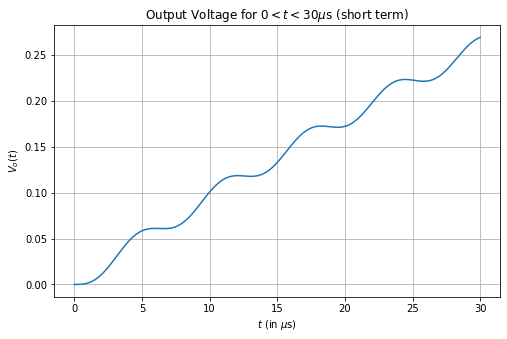

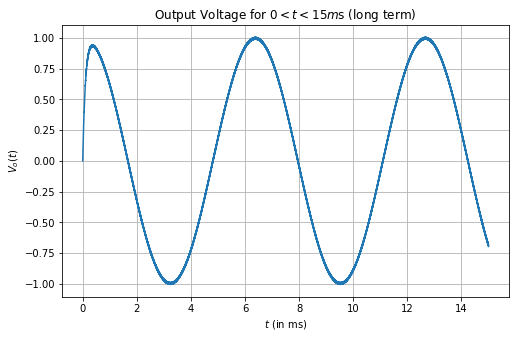

In [9]:
def v_o(t, H):
    v_i = np.cos(1e3 * t) * (t >= 0) - np.cos(1e6 * t) * (t >= 0)
    return sp.lsim(H, v_i, t)[1]

y = v_o(np.linspace(0, 30e-6, 10000), H)
plot(np.linspace(0, 30, 10000), y, "Output Voltage for $0<t<30\mu$s (short term)", "$t$ (in $\mu$s)", "$V_o(t)$")

y = v_o(np.linspace(0, 15e-3, 10000), H)
plot(np.linspace(0, 15, 10000), y, "Output Voltage for $0<t<15m$s (long term)", "$t$ (in ms)", "$V_o(t)$")